In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
housing = fetch_openml(name="house_prices", as_frame=True)
X = housing.data #説明変数
y = housing.target #目的変数
df = pd.concat([X, y], axis = 1)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
df = df.drop(columns = ['Id'])

In [3]:
df.isnull().sum()[df.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [4]:
df = df.drop(columns = ['Alley','FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])
df.dtypes


MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 75, dtype: object

In [5]:
df_object = df.select_dtypes(include = ['object'])
df_object_NAN_columns = df_object.isnull().sum()[df_object.isnull().sum() > 0].index
for col in df_object_NAN_columns:
    df.loc[df[col].isnull(), col] = df.loc[df[col].isnull(), col].fillna(df[col].mode()[0])

In [6]:
df_numerical = df.select_dtypes(include = ['int', 'float64'])
df_numerical_NAN_columns = df_numerical.isnull().sum()[df_numerical.isnull().sum() > 0].index
for col in df_numerical_NAN_columns:
    df.loc[df[col].isnull(), col] = df.loc[df[col].isnull(), col].fillna(df[col].mean())

In [7]:
df = pd.get_dummies(df, drop_first = True)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,False,False,False,False,True,False,False,False,True,False
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,False,False,False,False,True,False,False,False,True,False
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,False,False,False,False,True,False,False,False,True,False
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,False,False,False,False,True,False,False,False,True,False


In [8]:
import numpy as np
df['log_SalePrice'] = np.log10(df['SalePrice'])
df = df.drop(columns = ['SalePrice'])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3312
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 153
[LightGBM] [Info] Start training from score 5.222529
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3296
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 155
[LightGBM] [Info] Start training from score 5.223977
[LightGBM] [Warning] Found w

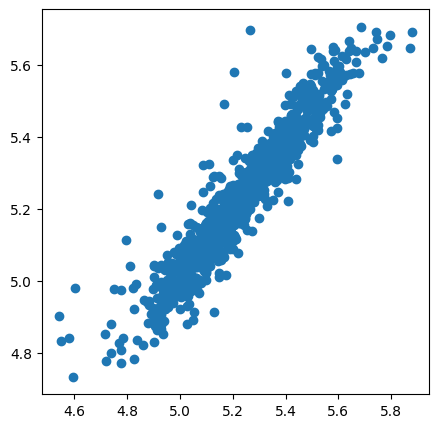

0.8903734980509351

In [9]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, random_state = 42, shuffle = True)

import lightgbm as lgb
verification = pd.DataFrame()
verification['y_test'] = df['log_SalePrice']
for train_idx, test_idx in kf.split(df):
    X_train = df.iloc[train_idx, :-1]
    y_train = df.iloc[train_idx, -1]
    X_test = df.iloc[test_idx, :-1]
    y_test = df.iloc[test_idx, -1]
    model = lgb.LGBMRegressor()
    model.fit(X_train, y_train)
    verification.loc[test_idx, 'y_pred'] = model.predict(X_test)
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(verification['y_test'], verification['y_pred']) # 散布図を描画
plt.show()
from sklearn.metrics import r2_score
r2_score(verification['y_test'], verification['y_pred'])

In [10]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, random_state = 42, shuffle = True)
import lightgbm as lgb
verification = pd.DataFrame()
verification['y_test'] = df['log_SalePrice']



In [17]:
for train_idx, test_idx in kf.split(df):
    X_train = df.iloc[train_idx, :-1]
    y_train = df.iloc[train_idx, -1]
    X_test = df.iloc[test_idx, :-1]
    y_test = df.iloc[test_idx, -1]

    model = lgb.LGBMRegressor()
    model.fit(X_train, y_train)
    verification.loc[test_idx, 'y_pred'] = model.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3312
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 153
[LightGBM] [Info] Start training from score 5.222529
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3296
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 155
[LightGBM] [Info] Start training from score 5.223977
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3312
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 153
[LightGBM] [Info] Start training from score 5.222529
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3296
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 155
[LightGBM] [Info] Start training from score 5.223977
[LightGBM] [Warning] Found w

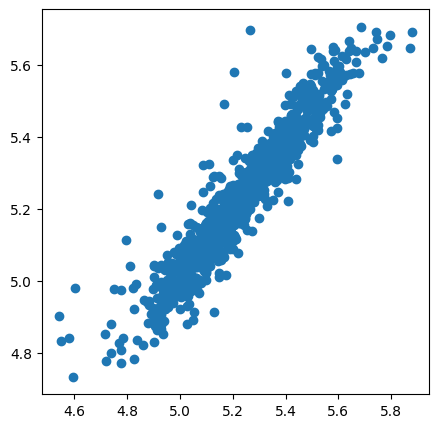

0.8903734980509351

In [18]:
for train_idx, test_idx in kf.split(df):
    X_train = df.iloc[train_idx, :-1]
    y_train = df.iloc[train_idx, -1]
    X_test = df.iloc[test_idx, :-1]
    y_test = df.iloc[test_idx, -1]
    
    model = lgb.LGBMRegressor()
    model.fit(X_train, y_train)
    verification.loc[test_idx, 'y_pred'] = model.predict(X_test)
    
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(verification['y_test'], verification['y_pred']) # 散布図を描画
plt.show()
from sklearn.metrics import r2_score
r2_score(verification['y_test'], verification['y_pred'])